In [1]:
import pandas as pd
import xgboost
import xgbClassification as cl
import xgbRegression as reg
import xgbMulticlassClassification as multi
import xgbVisualisation as viz
import matplotlib.pyplot as plt
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_excel('./../datos/Absenteeism_at_work_Project.xls')
df = df.drop('ID', axis=1)
df = df.dropna(subset=['Absenteeism time in hours'])

In [ ]:
# visualización de las variables

In [3]:
df['Reason for absence'] = df['Reason for absence'].astype(str)
df['Pet'] = df['Pet'].astype(str)

In [4]:
df = pd.get_dummies(df)

In [5]:
scaler = MinMaxScaler()

In [6]:
scaler.fit(df)

MinMaxScaler()

In [7]:
df1 = pd.DataFrame(scaler.transform(df))

In [8]:
df1.columns = df.columns

In [9]:
df1 = df1[[x for x in df1.columns if 'nan' not in x]]

In [10]:
yvar = df1['Absenteeism time in hours']
xvars = df[[x for x in df1.columns if x != 'Absenteeism time in hours']]

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(xvars, yvar, train_size = 0.80, random_state = 2)

In [12]:
trainXGB = reg.makeXGBMatrix(data=xtrain,
                             label=ytrain)

testXGB = reg.makeXGBMatrix(xtest,
                            ytest)

In [ ]:
finalXGB = reg.findXGBRegression(trainXGB,
                                 testXGB,
                                 xtrain,
                                 ytrain,
                                 xtest,
                                 ytest,
                                 iters=50)

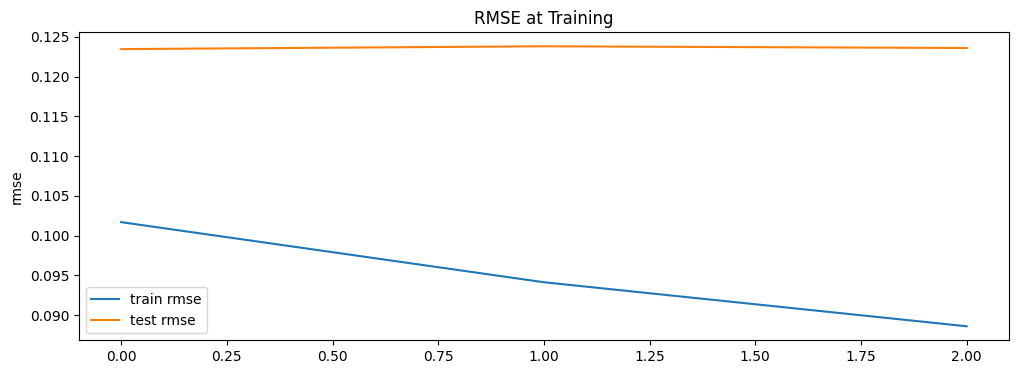

In [14]:
viz.visualise_metrics(finalXGB, mod = 'regression')

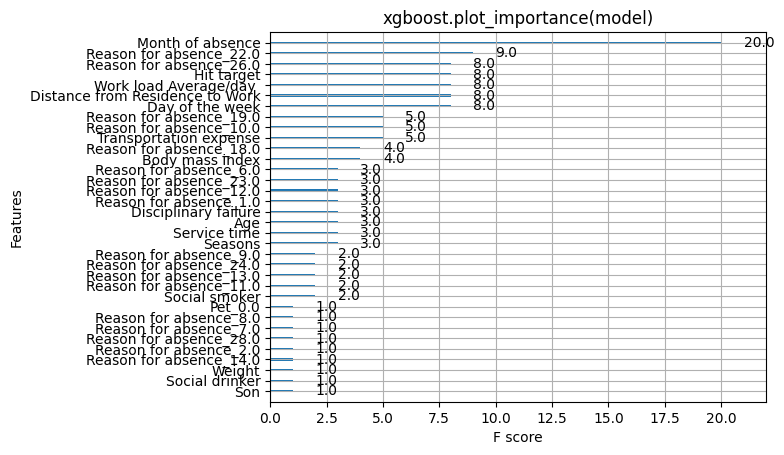

In [15]:
viz.plotVariableImportance(finalXGB, viz_type=None)

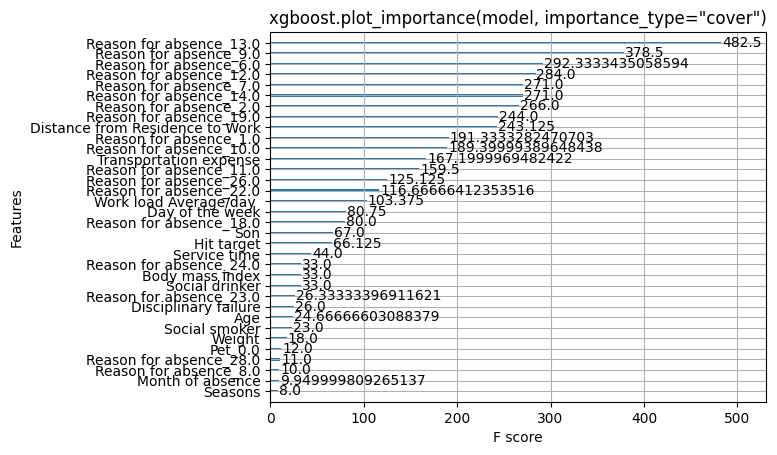

In [16]:
viz.plotVariableImportance(finalXGB, viz_type='cover')

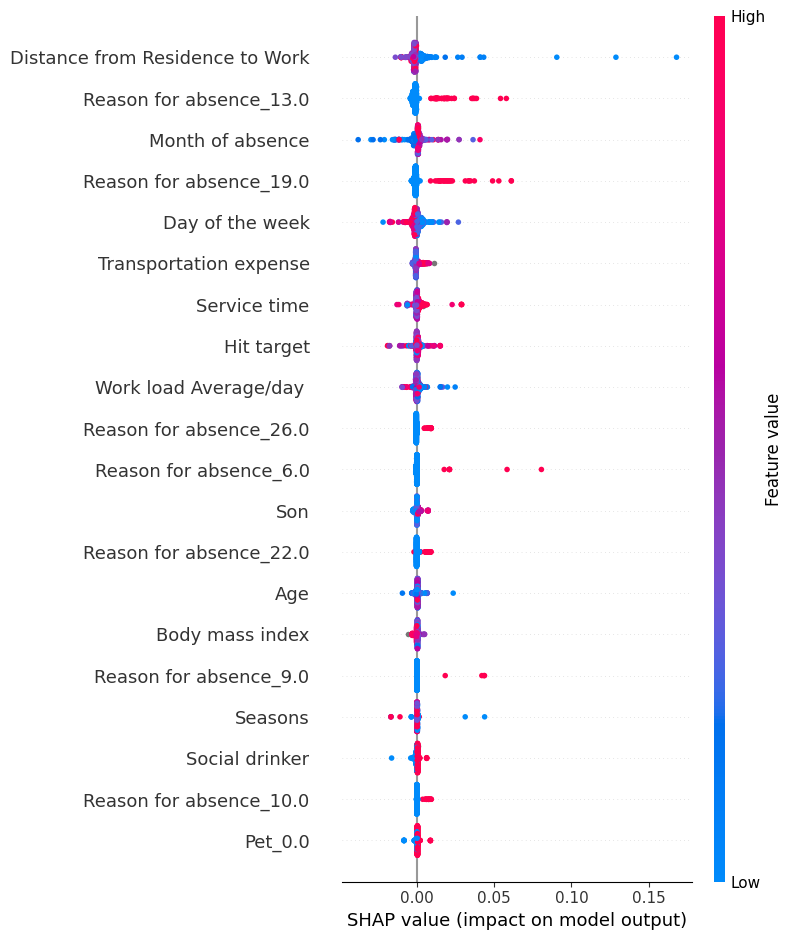

In [17]:
viz.make_shap_visualisation(finalXGB, xtrain)